In [1]:
import pandas as pd
import yfinance as yf
import bt
%matplotlib inline

# 정적 자산배분 백테스트

In [2]:
# d = bt.get(["spy", "agg"], start="2010-01-01")

portfolios = [
    # benchmark
    {
        "name": "BM",  # Permanent Portfolio
        "weight": {"SPY": 1}
    },
    # 카우치 포테이토
    # https://lazyquant.xyz/allocation/detail/CP
    {
        "name": "CP",  # Permanent Portfolio
        "weight": {"SPY": 0.50, "TIP": 0.50}
    },
    # 영구 포트폴리오
    # https://lazyquant.xyz/allocation/detail/PP
    {
        "name": "PP",  # Permanent Portfolio
        "weight": {"SPY": 0.25, "GLD": 0.25, "TLT": 0.25, "BIL": 0.25}
    },
    # 황금나비
    # https://lazyquant.xyz/allocation/detail/GB
    {
        "name": "GB",  # golden butterfly
        "weight": {"SPY": 0.2, "QQQ": 0.2, "GLD": 0.2, "TLT": 0.2, "SHY": 0.2}
    },
    # 황금나비 변형
    #
    {
        "name": "GB2",  # golden butterfly custom
        "weight": {"SPY": 0.3, "QQQ": 0.3, "GLD": 0.2, "TLT": 0.1, "SHY": 0.1}
    },
    # 예일대 기금
    # https://lazyquant.xyz/allocation/detail/YE
    {
        "name": "YE",
        "weight": {"SPY": 0.30, "VNQ": 0.20, "VEA": 0.15, "EEM": 0.5, "TLT": 0.15, "TIP": 0.15}
    }
]

In [3]:
_tickers = sum([list(it["weight"].keys()) for it in portfolios], [])
tickers = list(set(_tickers))
print("# Tickers: ")
print(tickers)

# Tickers: 
['TLT', 'VEA', 'TIP', 'EEM', 'SPY', 'VNQ', 'BIL', 'SHY', 'GLD', 'QQQ']


In [4]:
d = yf.download(tickers,
                start="2010-01-01",
                end="2019-12-12")['Adj Close'].dropna()
print(d.head())

[*********************100%***********************]  10 of 10 completed
                  BIL        EEM         GLD        QQQ        SHY        SPY  \
Date                                                                            
2009-12-31  87.427094  32.241184  107.309998  40.724121  74.824188  88.116386   
2010-01-04  87.388992  33.181217  109.800003  41.320518  74.923409  89.610832   
2010-01-05  87.369926  33.422058  109.699997  41.320518  75.013611  89.848053   
2010-01-06  87.369926  33.491982  111.510002  41.071285  75.022644  89.911308   
2010-01-07  87.369926  33.297764  110.820000  41.097992  75.004578  90.290848   

                  TIP        TLT        VEA        VNQ  
Date                                                    
2009-12-31  77.993904  64.927711  23.863054  27.823153  
2010-01-04  78.196587  64.869896  24.504986  27.705011  
2010-01-05  78.451813  65.288879  24.518946  27.673910  
2010-01-06  78.249115  64.414909  24.525928  27.624166  
2010-01-07  78.3692

In [5]:
def get_strategy(name, weight):
    s_layer = [
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        # bt.algos.WeighEqually(),\
        bt.algos.WeighSpecified(**weight),
        bt.algos.Rebalance()
    ]
    return bt.Strategy(name, s_layer)

In [6]:
strategys = [get_strategy(pf["name"], pf["weight"]) for pf in portfolios]
tests = [bt.Backtest(s, d) for s in strategys]
res = bt.run(*tests)

In [7]:
res.display()

Stat                 BM          CP          PP          GB          GB2         YE
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2009-12-30  2009-12-30  2009-12-30  2009-12-30  2009-12-30  2009-12-30
End                  2019-12-11  2019-12-11  2019-12-11  2019-12-11  2019-12-11  2019-12-11
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         242.90%     123.25%     86.99%      134.72%     185.11%     167.73%
Daily Sharpe         0.92        1.17        1.12        1.34        1.18        0.63
Daily Sortino        1.44        1.89        1.84        2.23        1.92        1.01
CAGR                 13.19%      8.41%       6.49%       8.96%       11.11%      10.41%
Max Drawdown         -19.35%     -10.27%     -8.75%      -6.98%      -11.42%     -25.67%
Calmar Ratio         0.68        0.82        0.74        1.28        0.97        0.41

MTD                  0.03% 

<AxesSubplot:title={'center':'Equity Progression'}>

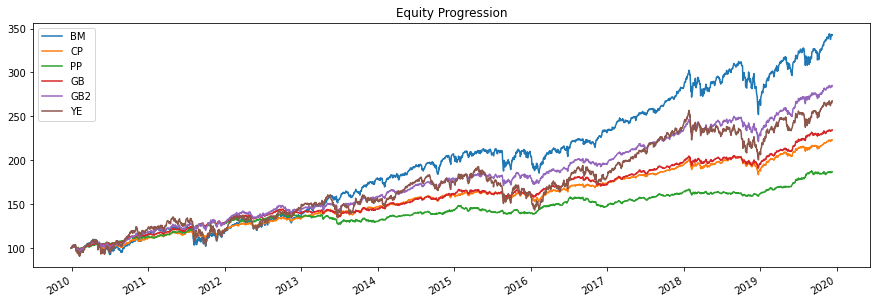

In [8]:
res.plot()

In [9]:
# dir(res)